In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sin_wave(amp, freq, time):
    return amp*np.sin(2*np.pi*freq*time)

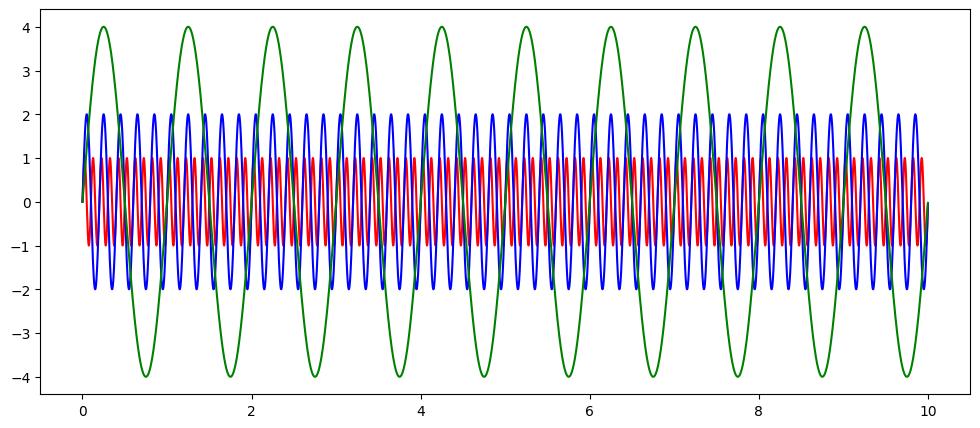

In [13]:
time = np.arange(0, 10, 0.001)
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)

plt.figure(figsize=(12, 5))
plt.plot(time, sin1, label=r'$\sin {20\pi} t$', color='red')
plt.plot(time, sin2, label=r'$\sin {10\pi} t$', color='blue')
plt.plot(time, sin3, label=r'$\sin {2\pi} t$', color='green')


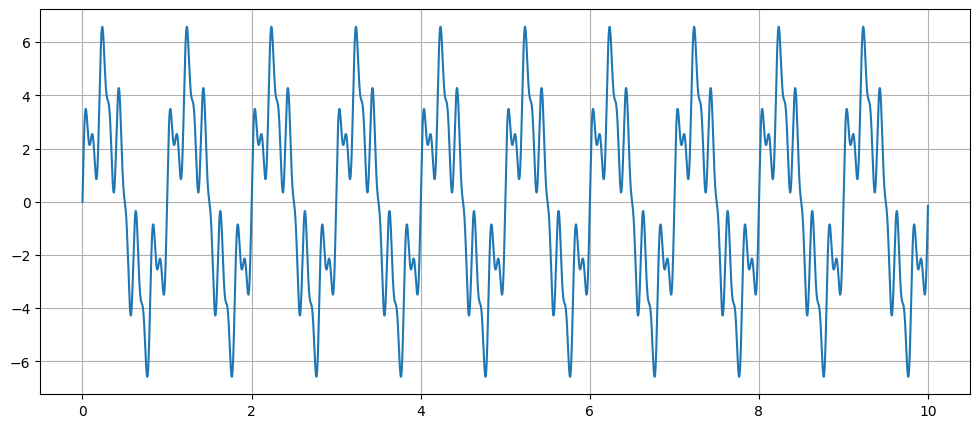

In [14]:
sin_sum = sin1 + sin2 + sin3

plt.figure(figsize=(12, 5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

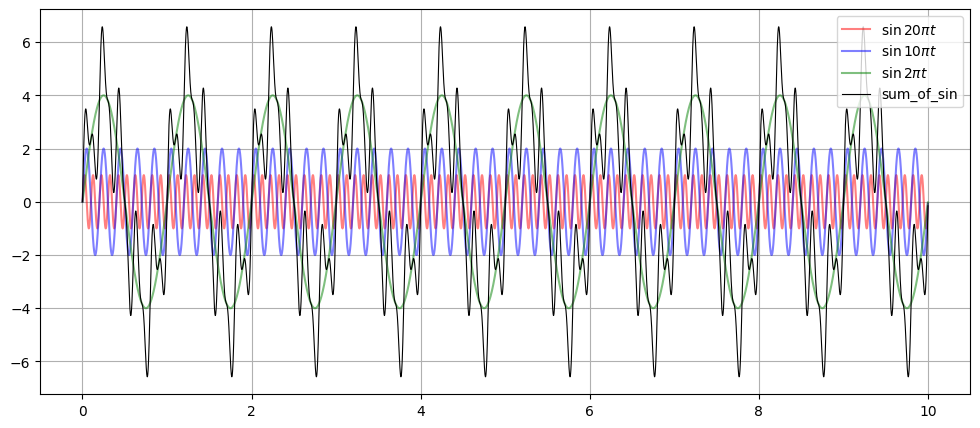

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(time, sin1, label=r'$\sin {20\pi} t$', color='red', alpha=0.5)
plt.plot(time, sin2, label=r'$\sin {10\pi} t$', color='blue', alpha=0.5)
plt.plot(time, sin3, label=r'$\sin {2\pi} t$', color='green', alpha=0.5)
plt.plot(time, sin_sum, label='sum_of_sin', color='black', lw=0.8)
plt.legend(); plt.grid(); plt.show()

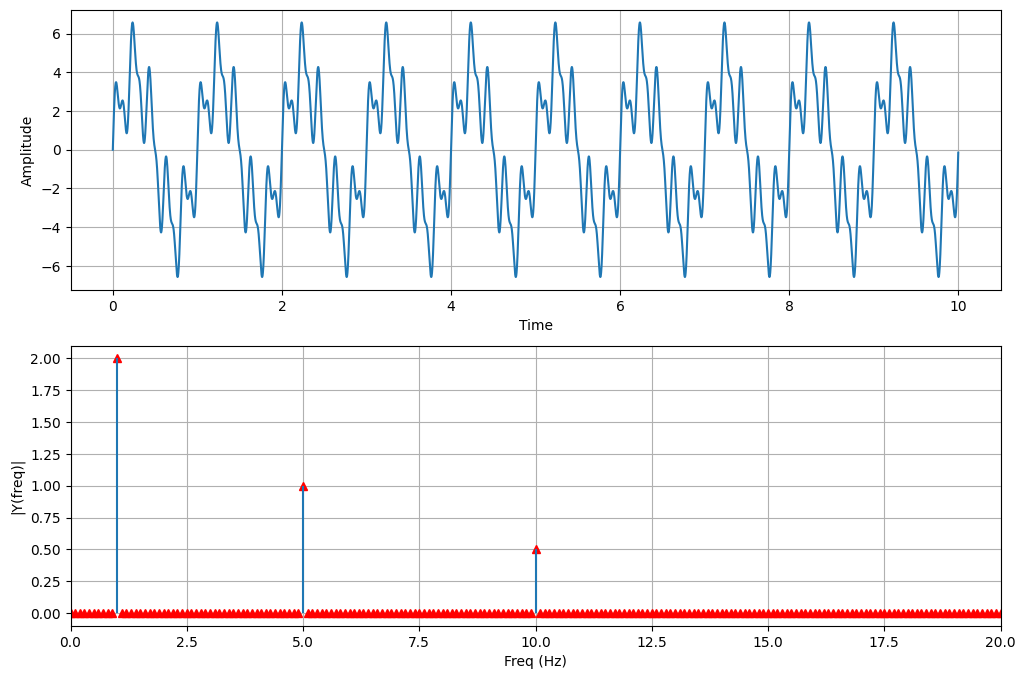

In [16]:
n = len(sin_sum)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs 
freq = k/T
freq = freq[range(int(n/2))]

Y = np.fft.fft(sin_sum)/n
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)

ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20])
ax[1].grid(True)

plt.show()

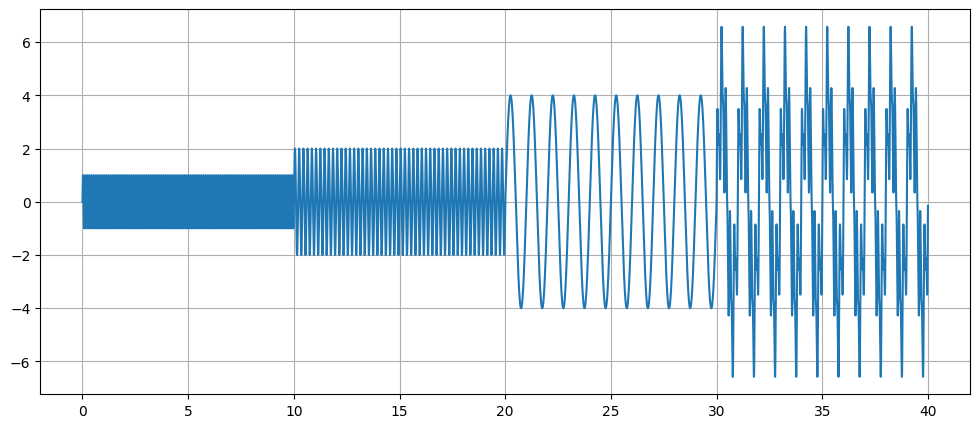

In [17]:
sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))

time = np.arange(0, 40, 0.001)

plt.figure(figsize=(12, 5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

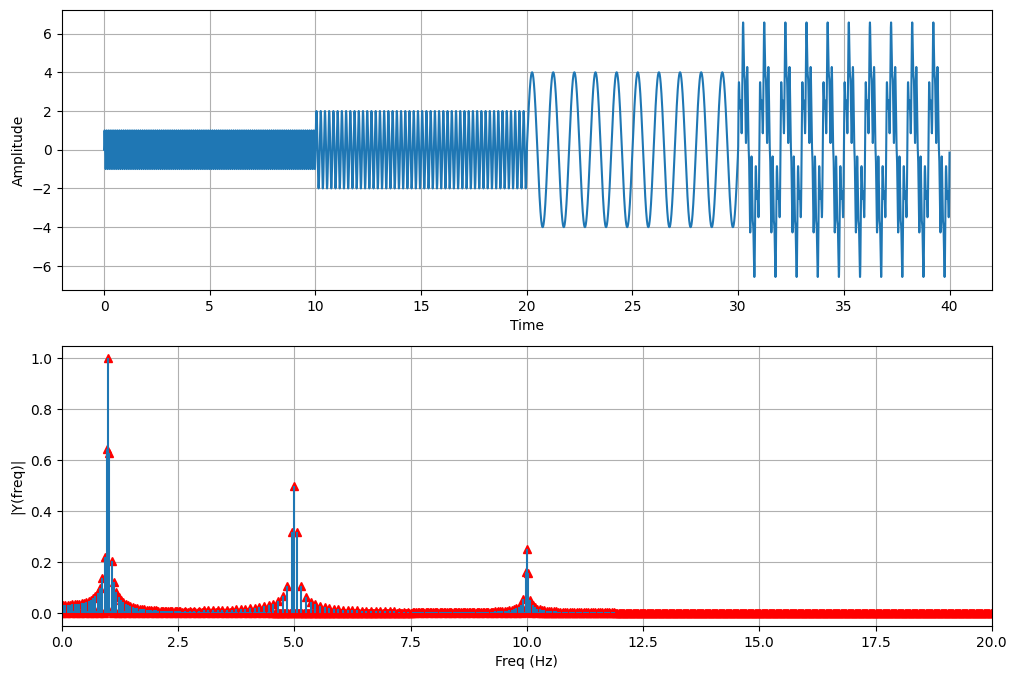

In [18]:
n = len(sin_concat)

k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]
Y = np.fft.fft(sin_concat)/n
Y = Y[range(int(n/2))]

fit, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(time, sin_concat)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)

ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([0, 20])
ax[1].vlines(freq, [0], abs(Y))
ax[1].grid(True)
plt.show()

In [19]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12 ,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim([0, 20])
    plt.show()

In [20]:
from scipy import signal


def calc_stft(nperseg):
    f, t, Zxx = signal.stft(sin_concat, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

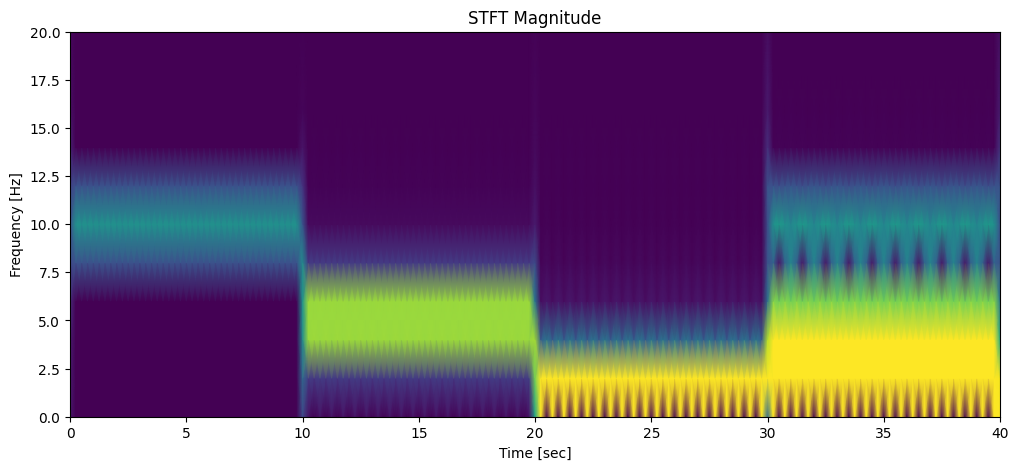

In [22]:
calc_stft(500)

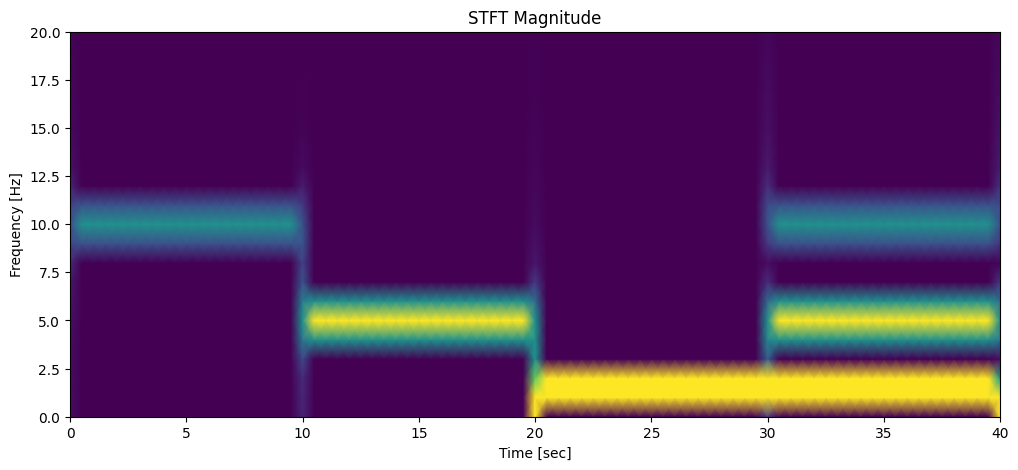

In [23]:
calc_stft(1000)

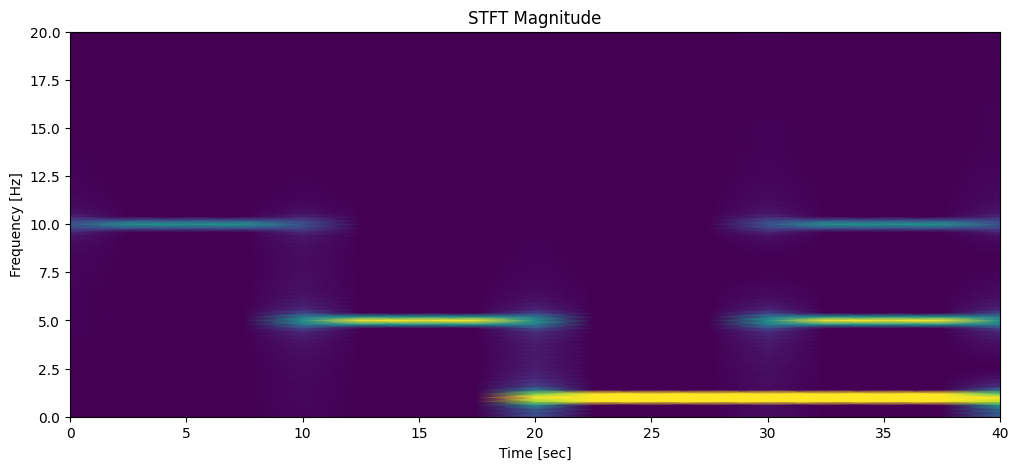

In [24]:
calc_stft(5000)

In [27]:
import librosa.display, librosa
import IPython.display
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [28]:
def sin_wave(amp, freq, time):
    return amp*np.sin(2*np.pi*freq*time)

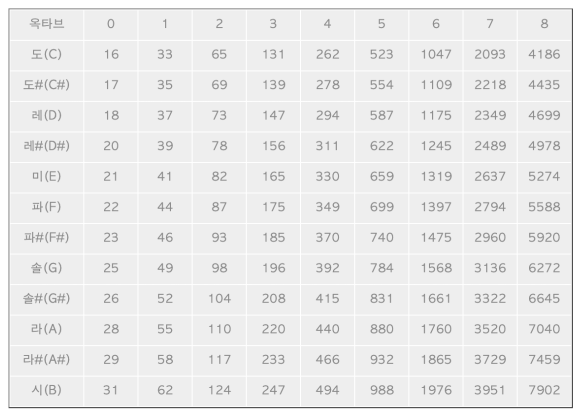

In [30]:
sr = 22*1000. # sampling rate
ts = 1/sr

time = np.arange(0, 1, ts)
DO = sin_wave(1, 261.6256, time)
MI = sin_wave(1, 329.6276, time)
SOL = sin_wave(1, 391.9954, time)

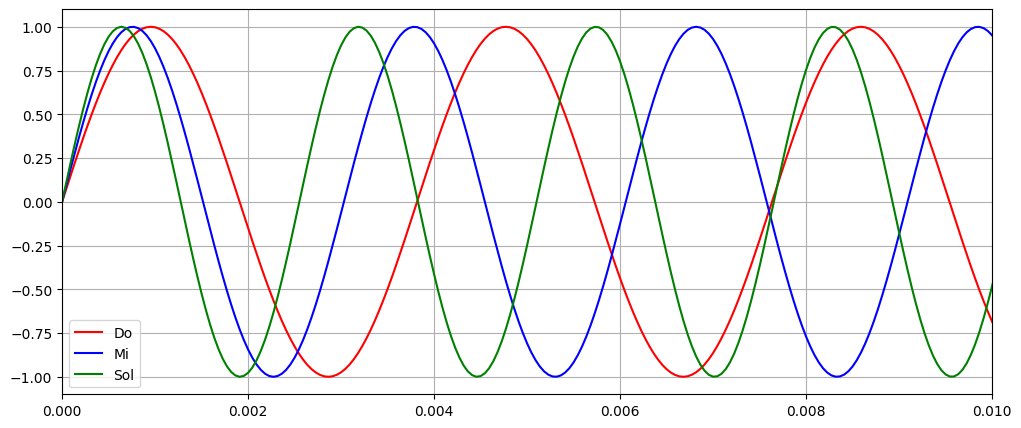

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(time, DO, label='Do', color='red')
plt.plot(time, MI, label='Mi', color='blue')
plt.plot(time, SOL, label='Sol', color='green')
plt.xlim((0, 0.01))
plt.legend()
plt.grid()
plt.show()

In [32]:
IPython.display.Audio(data=DO, rate=sr)

In [73]:
sample_concat = np.concatenate((DO, MI, SOL))
sample_concat.shape

(66000,)

In [74]:
IPython.display.Audio(data=sample_concat, rate=sr)

In [75]:
def draw_wave(sample_sounds):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, alpha=0.2)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.show()

In [76]:
def get_stft(sample_sounds):
    return librosa.stft(sample_sounds)

In [77]:
def draw_stft(sample_sound, ylim=(None, None)):
    plt.figure(figsize=(12 ,6))
    librosa.display.specshow(np.abs(
        get_stft(sample_sound)),
        y_axis='hz', x_axis='s')
    plt.ylim(ylim)
    plt.grid()
    plt.show()

In [78]:
draw_stft(sample_concat, ylim=(0, 700))

ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

<Figure size 1200x600 with 0 Axes>